##Tipos de Distancias para Técnicas de Clustering

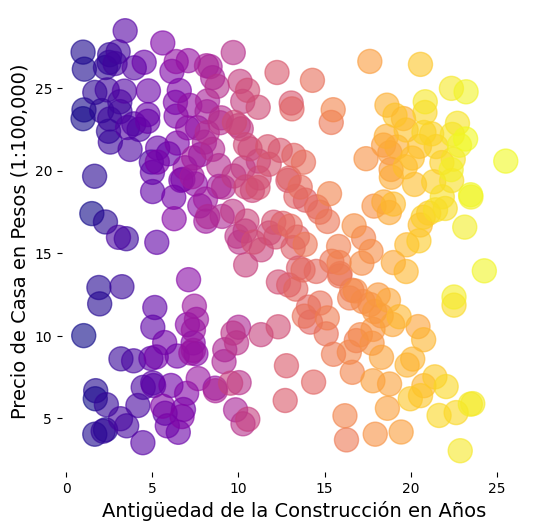

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Cargar datos
datos = np.loadtxt("venta_propiedades.csv", delimiter=",")

# Graficar datos
plt.figure(figsize=(6, 6))
plt.scatter(datos[:, 0], datos[:, 1],
            c=np.linspace(0, 1, datos.shape[0]), s=300, alpha=0.6)
plt.xlabel("Antigüedad de la Construcción en Años", fontsize=14)
plt.ylabel("Precio de Casa en Pesos (1:100,000)", fontsize=14)
plt.box(False)
plt.show()

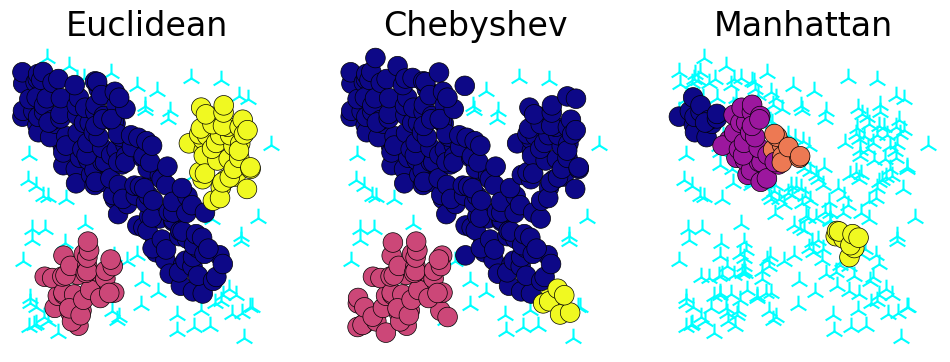

In [ ]:
from sklearn.cluster import DBSCAN

# Cargar datos
datos = np.loadtxt("venta_propiedades.csv", delimiter=",")

# Identificar Clusters con diferentes distancias
distancias = ["euclidean", "chebyshev", "manhattan"]

fig = plt.figure(figsize=(12, 4))
plt.set_cmap("plasma")
for d in range(len(distancias)):
    clusters = DBSCAN(2, min_samples=10,
                      metric=distancias[d]).fit_predict(datos)
    ax = fig.add_subplot(1, 3, d+1)
    # puntos considerados ruido
    ax.scatter(datos[clusters==-1][:, 0], datos[clusters==-1][:, 1],
               c="cyan", s=200, marker="2")
    # puntos pertenencientes a clusters
    ax.scatter(datos[clusters>=0][:, 0], datos[clusters>=0][:, 1],
               c=clusters[clusters>=0], s=200,
               linewidth=0.5, edgecolors="black")
    ax.set_title(distancias[d].capitalize(), fontsize=24)
    ax.axis("off")

plt.show()

#K-Means

El K-means es un método de Clustering que separa 'K' grupos de objetos (Clusters) de similar varianza, minimizando un concepto conocido como inercia, que es la suma de las distancias al cuadrado de cada objeto del Cluster a un punto 'μ' conocido como Centroide (punto medio de todos los objetos del Cluster)

##Ejemplo Básico

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 5], [1, 0], [1, 3],
              [10, 2], [10, 3], [10, 4], [10, 1]])
kmeans = KMeans(n_clusters=2).fit(X)
print(kmeans.labels_)



[1 1 1 1 0 0 0 0]


In [ ]:
pred = kmeans.predict([[0, 0]])
print(pred)

[1]


In [ ]:
kmeans.cluster_centers_

array([[10. ,  2.5],
       [ 1. ,  2.5]])

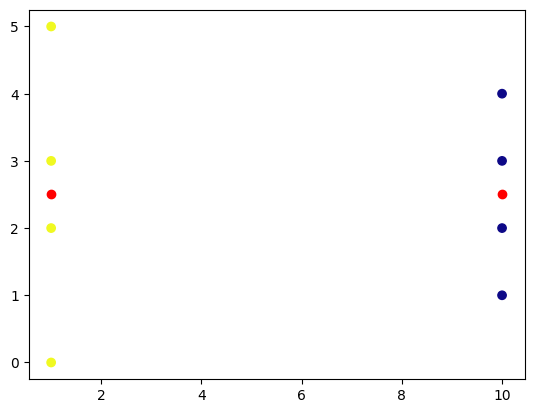

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='r')
plt.show()

##Dataset Vinos

In [ ]:
from sklearn.datasets import load_wine

In [ ]:
wine_df = load_wine(as_frame=True)
wine_df = wine_df.frame
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
wine_df = wine_df.drop("target", axis = 1)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
from sklearn.cluster import KMeans

inertia_values = []
for i in range(1, 11):  # Check for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(wine_df)
    inertia_values.append(kmeans.inertia_)

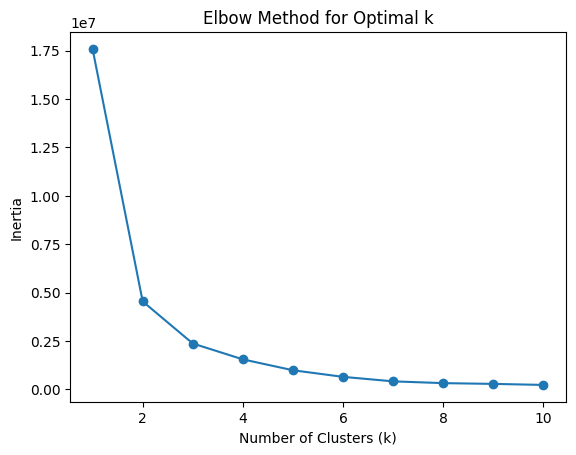

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
# Assuming you found the optimal k to be 3 (replace with your value)
k = 3

# Create a KMeans instance with the desired number of clusters
kmeans = KMeans(n_clusters=k)

# Fit the model to your data
kmeans.fit(wine_df)

# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels as a new column to your DataFrame
wine_df['cluster'] = cluster_labels

# You can now explore the clusters in your DataFrame
wine_df.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
65,12.37,1.21,2.56,18.1,98.0,2.42,2.65,0.37,2.08,4.60,1.190,2.30,678.0,2
70,12.29,1.61,2.21,20.4,103.0,1.10,1.02,0.37,1.46,3.05,0.906,1.82,870.0,2
66,13.11,1.01,1.70,15.0,78.0,2.98,3.18,0.26,2.28,5.30,1.120,3.18,502.0,0
90,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.080,2.27,480.0,0
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.690,2.84,352.0,0


In [ ]:
# Calculate inertia
inertia_value = kmeans.inertia_

# Print the inertia value
print(f"Inertia for k={k}: {inertia_value}")

Inertia for k=3: 2370689.6867829696


In [ ]:
kmeans.cluster_centers_

array([[1.25166667e+01, 2.49420290e+00, 2.28855072e+00, 2.08231884e+01,
        9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
        1.45188406e+00, 4.08695651e+00, 9.41159420e-01, 2.49072464e+00,
        4.58231884e+02],
       [1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.70234043e+01,
        1.05510638e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
        1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
        1.19514894e+03],
       [1.29298387e+01, 2.50403226e+00, 2.40806452e+00, 1.98903226e+01,
        1.03596774e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
        1.50338710e+00, 5.65032258e+00, 8.83967742e-01, 2.36548387e+00,
        7.28338710e+02]])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2) # reduce a 2 dimensiones para la gráfica
wine_df_pca = pca.fit_transform(wine_df.drop('cluster', axis=1)) # elimina 'cluster' para PCA

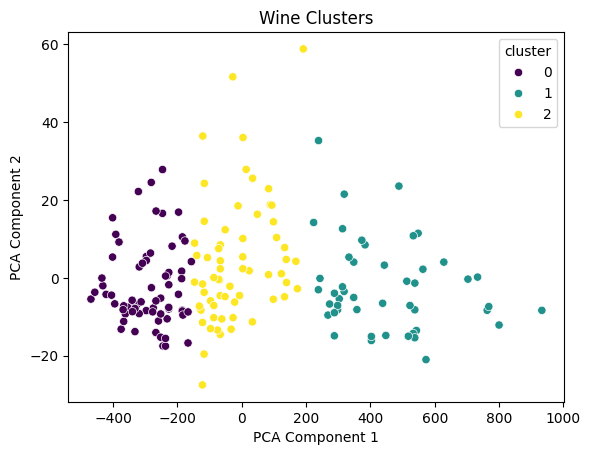

In [ ]:
sns.scatterplot(x=wine_df_pca[:, 0], y=wine_df_pca[:, 1], hue=wine_df['cluster'], palette='viridis')
plt.title('Wine Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

#Tarea

- Cargar data set
  - from sklearn.datasets import load_iris
  - iris = load_iris()
- Realizar agrupamiento con método K-means

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

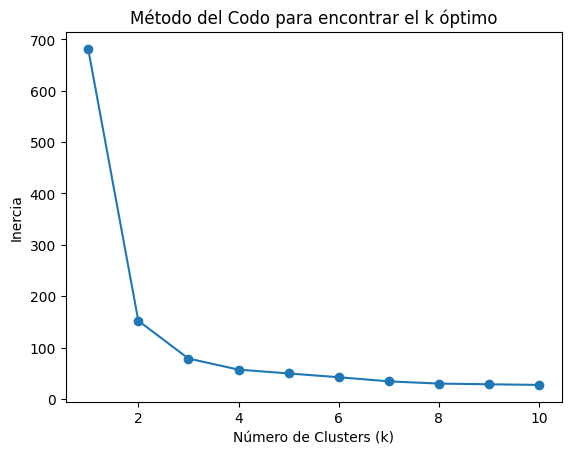

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Rango de valores de k a evaluar
k_values = range(1, 11)

# Lista para almacenar los valores de inercia
inertia_values = []

# Calcular la inercia para cada valor de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)  # Ajustar el modelo a los datos
    inertia_values.append(kmeans.inertia_)  # Guardar la inercia

# Graficar los resultados
plt.plot(k_values, inertia_values, marker='o')
plt.title('Método del Codo para encontrar el k óptimo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3).fit(X)

In [ ]:
kmeans.cluster_centers_


array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

In [ ]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)